In [1]:
import pandas as pd
import numpy as np

In [2]:
df_infl = pd.read_excel('inflacion.xlsx')

In [3]:
df_infl

,fecha,Indice_general,Alimentos_procesados,Alimentos_no_procesados,Bienes_industriales,Energia,Servicios
0,2001-01,71.94,63.25,68.91,87.30,59.91,69.34
1,2001-02,71.94,63.36,68.60,87.18,60.21,69.45
2,2001-03,72.52,63.43,69.43,88.64,60.15,69.70
3,2001-04,73.17,63.49,69.65,90.06,61.12,70.10
4,2001-05,73.43,63.81,69.99,90.35,62.21,70.06
...,...,...,...,...,...,...,...
232,2020-05,104.41,104.81,115.30,104.37,87.14,107.26
233,2020-06,104.87,104.47,115.03,103.80,90.61,107.87
234,2020-07,103.23,104.18,112.99,98.12,92.62,107.17
235,2020-08,103.23,104.26,113.08,97.53,92.94,107.39


### Changing columns names

In [4]:
df_infl.columns=["Year","infl_gen", "ener", "alim_fres", "alim_proc", "serv", "goods"]

In [5]:
df_infl

,Year,infl_gen,ener,alim_fres,alim_proc,serv,goods
0,2001-01,71.94,63.25,68.91,87.30,59.91,69.34
1,2001-02,71.94,63.36,68.60,87.18,60.21,69.45
2,2001-03,72.52,63.43,69.43,88.64,60.15,69.70
3,2001-04,73.17,63.49,69.65,90.06,61.12,70.10
4,2001-05,73.43,63.81,69.99,90.35,62.21,70.06
...,...,...,...,...,...,...,...
232,2020-05,104.41,104.81,115.30,104.37,87.14,107.26
233,2020-06,104.87,104.47,115.03,103.80,90.61,107.87
234,2020-07,103.23,104.18,112.99,98.12,92.62,107.17
235,2020-08,103.23,104.26,113.08,97.53,92.94,107.39


In [6]:
months=[]
years=[]

for i in range(len(df_infl['Year'])):
    months.append(df_infl["Year"][i].split('-')[1])
    years.append(df_infl['Year'][i].split('-')[0])


In [7]:
df_infl["Year"]=years

In [8]:
df_infl.insert(1,"Months",months)

In [9]:
df_infl

,Year,Months,infl_gen,ener,alim_fres,alim_proc,serv,goods
0,2001,01,71.94,63.25,68.91,87.30,59.91,69.34
1,2001,02,71.94,63.36,68.60,87.18,60.21,69.45
2,2001,03,72.52,63.43,69.43,88.64,60.15,69.70
3,2001,04,73.17,63.49,69.65,90.06,61.12,70.10
4,2001,05,73.43,63.81,69.99,90.35,62.21,70.06
...,...,...,...,...,...,...,...,...
232,2020,05,104.41,104.81,115.30,104.37,87.14,107.26
233,2020,06,104.87,104.47,115.03,103.80,90.61,107.87
234,2020,07,103.23,104.18,112.99,98.12,92.62,107.17
235,2020,08,103.23,104.26,113.08,97.53,92.94,107.39


### Calculating inter annual growth and storing it in "df_infl_yoy"

In [10]:
sum_years=df_infl.groupby(["Year"]).sum()
df_infl_yoy=sum_years.pct_change()
df_infl_yoy.fillna(0)

,infl_gen,ener,alim_fres,alim_proc,serv,goods
Year,,,,,,
2001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2002,0.035904,0.049183,0.046616,0.025756,-0.001596,0.046189
2003,0.031035,0.034778,0.045560,0.021577,0.013260,0.036531
2004,0.030537,0.041870,0.036511,0.010285,0.048244,0.036520
2005,0.033841,0.034553,0.033270,0.010312,0.096654,0.037558
2006,0.035613,0.038746,0.038521,0.015076,0.079687,0.038794
2007,0.028430,0.039116,0.042664,0.007035,0.016921,0.038966
2008,0.041307,0.074064,0.038863,0.004098,0.119354,0.039346
2009,-0.002390,0.010056,-0.006798,-0.008935,-0.089568,0.021893


-----

### Q 4 : Create a "df_stats" dataframe that contains the mean, variance, standard deviation and median of the year-on-year growth of each series for the period 2015-2016. The result must be a table of dimensions (4X6) where the names of the rows are those of each statistic and each column that of the corresponding series

In [11]:
df_stats=pd.DataFrame()

In [12]:
df_stats["Mean"]=df_infl_yoy[14:16].mean()
df_stats["Median"]=df_infl_yoy[14:16].median()
df_stats["Std"]=df_infl_yoy[14:16].std()
df_stats["Variance"]=df_infl_yoy[14:16].var()

df_stats=df_stats.T

In [13]:
df_stats

,infl_gen,ener,alim_fres,alim_proc,serv,goods
Mean,-0.004830,0.008108,0.017062,0.001950,-0.087923,0.007110
Median,-0.004830,0.008108,0.017062,0.001950,-0.087923,0.007110
Std,0.002070,0.002133,0.003613,0.001921,0.002566,0.002603
Variance,0.000004,0.000005,0.000013,0.000004,0.000007,0.000007


-----

### Q 5: ) Obtain the correlation matrix of the six series in variations

In [14]:
correlation_matrix=df_stats.loc["Variance"].corr
correlation_matrix

<bound method Series.corr of infl_gen     0.000004
ener         0.000005
alim_fres    0.000013
alim_proc    0.000004
serv         0.000007
goods        0.000007
Name: Variance, dtype: float64>

------

### Q 6 : Create a series "sr_infl_gen" that contains the monthly growth of the series "infl_gen"

In [15]:
df_monthly=df_infl[["Year","Months","infl_gen"]]
sr_infl_gen=df_monthly['infl_gen'].pct_change().round(4)
sr_infl_gen.fillna(0)

0      0.0000
1      0.0000
2      0.0081
3      0.0090
4      0.0036
        ...  
232    0.0006
233    0.0044
234   -0.0156
235    0.0000
236    0.0045
Name: infl_gen, Length: 237, dtype: float64

-----

### Q 7 : tandardize the "sr_infl_gen" series (subtract the mean and divide by standard deviation)and plot a histogram of the standardized series (Hint: plt.hist)

In [16]:
normalized_df=(sr_infl_gen-sr_infl_gen.mean())/sr_infl_gen.std()
normalized_df.fillna(0)
normalized_df.hist()

-------

### Q 8 : Using Boolean indexing, choose one of the six series of "df_infl_yoy" and substitute values less than zero for zero.

In [17]:
# i selected series "ener"

df_infl_yoy['ener'][df_infl_yoy['ener']<0]=0
df_infl_yoy=df_infl_yoy.fillna(0)
df_infl_yoy['ener']

Year
2001    0.000000
2002    0.049183
2003    0.034778
2004    0.041870
2005    0.034553
2006    0.038746
2007    0.039116
2008    0.074064
2009    0.010056
2010    0.013840
2011    0.042513
2012    0.034658
2013    0.030829
2014    0.000000
2015    0.009616
2016    0.006600
2017    0.004032
2018    0.010199
2019    0.007019
2020    0.000000
Name: ener, dtype: float64

------

### Q 9 : Using the data in the "pesos" tab, calculate the contribution to year-on-year growth ("df_infl_yoy") of each of the five components to headline inflation. * Attention: the weights are annual and the CPI data are monthly. You can monthlyize the data with pandas' resample function (resample ('M'). Bfill ()). The result of the monthlyization must be a dataframe with the same months as df_infl_yoy

In [18]:
url="inflacion.xlsx"

In [19]:
df_pesos=pd.read_excel(url, sheet_name='Pesos')
df_pesos.columns=["date","infl_gen", "ener", "alim_fres", "alim_proc", "serv", "goods"]


In [20]:
sum_years.reset_index(inplace=True)

In [21]:
infl_change=[]
ener=[]
alim_fres=[]
alim_proc=[]
serv=[] 
goods=[]

for i in range(len(df_pesos)):
    infl_chage= ( df_pesos.iloc[: , [1]]['infl_gen'][i] - sum_years.iloc[:,[1]]['infl_gen'][i] ) / (sum_years.iloc[:,[1]]['infl_gen'][i])
    infl_change.append(infl_chage)
    
    ener_chage=( df_pesos.iloc[: , [2]]['ener'][i] - sum_years.iloc[:,[2]]['ener'][i] ) / (sum_years.iloc[:,[2]]['ener'][i])
    ener.append(ener_chage)
    
    alim_fres_chage=( df_pesos.iloc[: , [3]]['alim_fres'][i] - sum_years.iloc[:,[3]]['alim_fres'][i] ) / (sum_years.iloc[:,[3]]['alim_fres'][i])
    alim_fres.append(alim_fres_chage)
    
    alim_proc_chage=( df_pesos.iloc[: , [4]]['alim_proc'][i] - sum_years.iloc[:,[4]]['alim_proc'][i] ) / (sum_years.iloc[:,[4]]['alim_proc'][i])
    alim_proc.append(alim_proc_chage)
    
    serv_chage=( df_pesos.iloc[: , [5]]['serv'][i] - sum_years.iloc[:,[5]]['serv'][i] ) / (sum_years.iloc[:,[5]]['serv'][i])
    serv.append(serv_chage)
    
    goods_chage=( df_pesos.iloc[: , [6]]['goods'][i] - sum_years.iloc[:,[6]]['goods'][i] ) / (sum_years.iloc[:,[6]]['goods'][i])
    goods.append(goods_chage)

year_to_year_contribution=pd.DataFrame({"year":sum_years.iloc[:,[0]]['Year'],"infl_gen":infl_change, "ener":ener, "alim_fres":alim_fres, "alim_proc":alim_proc, "serv":serv, "goods":goods})

In [22]:
df_num=year_to_year_contribution._get_numeric_data()
df_num=df_num[df_num<0]*-1
df_num["Year"]=[x for x in range(2000,2020)]
year_to_year_contribution=df_num
year_to_year_contribution.fillna(year_to_year_contribution['infl_gen'].mean())


,infl_gen,ener,alim_fres,alim_proc,serv,goods,Year
0,0.139769,0.838965,0.859380,0.710140,0.864573,0.587908,2000
1,0.139769,0.843297,0.862200,0.716156,0.879743,0.601445,2001
2,0.139769,0.849640,0.868735,0.726632,0.874554,0.613855,2002
3,0.139769,0.853858,0.869000,0.739322,0.881532,0.620696,2003
4,0.139769,0.858661,0.873299,0.744544,0.892390,0.631100,2004
5,0.034302,0.863634,0.880863,0.749642,0.896575,0.644106,2005
6,0.060998,0.872703,0.884243,0.757483,0.894579,0.651845,2006
7,0.098246,0.888466,0.898141,0.753407,0.904121,0.655795,2007
8,0.096086,0.899930,0.908182,0.747331,0.889153,0.651582,2008
9,0.114182,0.896961,0.908314,0.756405,0.902968,0.650050,2009


--------

### Q 10 : Make a stacked bar chart with the contributions calculated in section

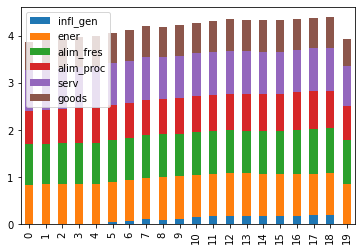

In [23]:
year_to_year_contribution[["infl_gen", "ener", "alim_fres", "alim_proc", "serv", "goods"]].plot(kind="bar", stacked=True)

-------
### Q 11 : How much did fresh food prices grow in the last month in year-on-year terms? Is this growth above or below its historical average?

In [24]:
year_to_year_contribution.drop("Year",axis=1,inplace=True)
year_to_year_contribution=year_to_year_contribution.fillna(year_to_year_contribution["infl_gen"].mean())*100
year_to_year_contribution.insert(0,"Year",[x for x in range(2000,2020)])


In [25]:
year_to_year_contribution

,Year,infl_gen,ener,alim_fres,alim_proc,serv,goods
0,2000,13.976921,83.896468,85.938019,71.014047,86.457307,58.790767
1,2001,13.976921,84.329688,86.219982,71.615645,87.974314,60.144452
2,2002,13.976921,84.963952,86.873524,72.663188,87.455418,61.385545
3,2003,13.976921,85.385754,86.900033,73.932248,88.153160,62.069582
4,2004,13.976921,85.866093,87.329928,74.454373,89.239049,63.110025
5,2005,3.430161,86.363394,88.086263,74.964179,89.657497,64.410585
6,2006,6.099760,87.270317,88.424278,75.748256,89.457897,65.184468
7,2007,9.824609,88.846577,89.814124,75.340676,90.412063,65.579550
8,2008,9.608605,89.992990,90.818221,74.733093,88.915313,65.158203
9,2009,11.418195,89.696058,90.831355,75.640489,90.296767,65.005030


### As we can see from the data frame that for different series theres is increase from minimum of 6% to maximum of approxamitaly 95%.

### This change is normally above its historicall average growth.